In [1]:
%matplotlib ipympl
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn

seaborn.set(context="notebook", style="darkgrid")
plt.rcParams["figure.figsize"] = (8, 6)
from tqdm.auto import tqdm, trange

from ssptools import evolve_mf_3 as emf3
from limepy import limepy

import numpy as np
import scipy as sp
import astropy.units as u
import astropy.constants as const

from binaryshift import BinaryShift

In [2]:
m123 = [0.1, 0.5, 1.0, 100]  # Slope breakpoints for initial mass function
a12 = [-0.468, -1.178, -2.117]  # Slopes for initial mass function
nbin12 = [5, 5, 20]

# Output times for the evolution
tout = np.array([11000])

# Integration settings
N0 = 5e5  # Normalization of stars
Ndot = -0.0001  # Regulates how low mass objects are depleted default -20, 0 for 47 Tuc
tcc = 0  # Core collapse time
NS_ret = 0.1  # Initial neutron star retention
BH_ret_int = 1  # Initial Black Hole retention
BH_ret_dyn = 0.00235  # Dynamical Black Hole retention
FeHe = -0.7  # Metallicity

In [3]:
f = emf3.evolve_mf(
    m123=m123,
    a12=a12,
    nbin12=nbin12,
    tout=tout,
    N0=N0,
    Ndot=Ndot,
    tcc=tcc,
    NS_ret=NS_ret,
    BH_ret_int=BH_ret_int,
    BH_ret_dyn=BH_ret_dyn,
    FeHe=FeHe,
    natal_kicks=True,
    vesc=100,
)

/home/peter/research/ssptools/ssptools/evolve_mf_3.py:321: RuntimeWarning: divide by zero encountered in true_divide
  As = Ns / P1
/home/peter/research/ssptools/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)


In [4]:
f

In [5]:
cs = f.Ns[-1] > 10 * f.Nmin
cr = f.Nr[-1] > 10 * f.Nmin
mj = np.r_[f.ms[-1][cs], f.mr[-1][cr]]
Mj = np.r_[f.Ms[-1][cs], f.Mr[-1][cr]]
dms = f.mes[-1][1:] - f.mes[-1][0:-1]
nms = len(f.ms[-1][cs])

In [6]:
f.Nmin

0.1

In [7]:
Mj / mj

array([2.95883348e+04, 3.51148719e+04, 4.16736635e+04, 4.94575166e+04,
       5.86952514e+04, 2.71682569e+04, 2.65060641e+04, 2.58600120e+04,
       2.29833309e+04, 6.95280608e+04, 5.21309472e+04, 1.06014224e+04,
       9.56144999e+03, 1.82354947e+04, 2.04397763e+03, 1.20576114e+00,
       1.97377636e+00, 2.93273915e+00, 4.64349427e+00, 8.05495321e+00,
       4.69949195e+00])

In [8]:
bs = BinaryShift(mj=mj, Mj=Mj, MF=f, verbose=False)

In [9]:
bs.dump()

self.mj = array([0.11851084, 0.16351292, 0.22560363, 0.31127202, 0.42947124,
       0.53616312, 0.6158897 , 0.70747148, 0.80754321, 0.6158897 ,
       0.70747148, 0.80754321, 0.92779583, 1.11896564, 1.40869427,
       2.81071458, 3.53848001, 4.45468241, 5.60811288, 7.06019582,
       8.88825993])
self.Mj = array([3.50653839e+03, 5.74173527e+03, 9.40172964e+03, 1.53947409e+04,
       2.52079221e+04, 1.45666174e+04, 1.63248118e+04, 1.82952210e+04,
       1.85600328e+04, 4.28216163e+04, 3.68811585e+04, 8.56110667e+03,
       8.87107346e+03, 2.04048921e+04, 2.87933957e+03, 3.38905042e+00,
       6.98416820e+00, 1.30644215e+01, 2.60412400e+01, 5.68695470e+01,
       4.17703060e+01])
self._nms = 8
self._mWD_max = 1.2485309234871975
self._mBH_min = 2.51188643150958


In [10]:
bs.MS_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [11]:
bs.mj[bs.MS_mask]

array([0.11851084, 0.16351292, 0.22560363, 0.31127202, 0.42947124,
       0.53616312, 0.6158897 , 0.70747148, 0.80754321])

In [12]:
mj_new, Mj_new = bs.shift_flat(fb=0.15)
# mj_new, Mj_new = bs.shift_equal(fb=0.25)
# mj_new, Mj_new = bs.shift_solar(fb=0.25)

In [13]:
bs._q_min

0.1467547966832377

Text(0.5, 0, 'mj [$M_\\odot$]')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
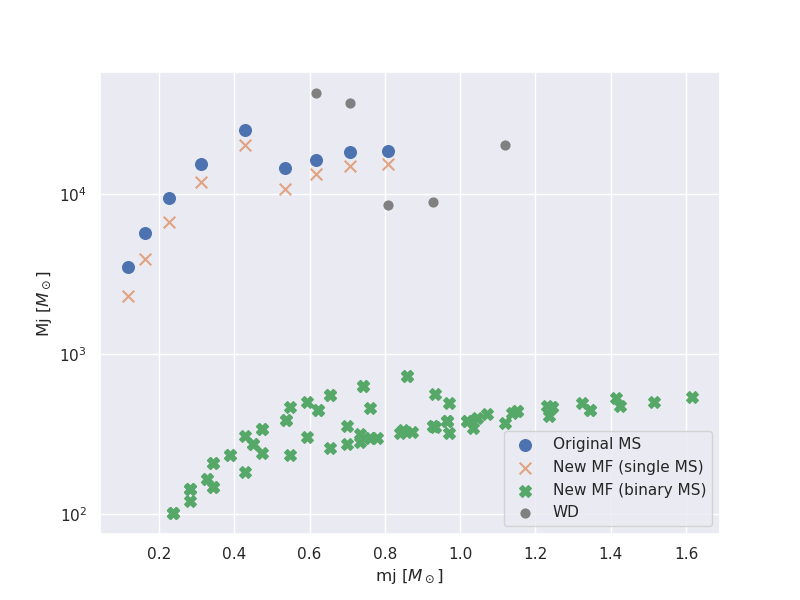

In [14]:
plt.figure()
plt.scatter(mj[bs.MS_mask], Mj[bs.MS_mask], label="Original MS", s=70)

# plt.scatter(mj, Mj, label="Original MF", s=70)

plt.yscale("log")
# plt.ylim(1e2, 1e5)
plt.scatter(
    mj_new[bs.MS_mask_new],
    Mj_new[bs.MS_mask_new],
    label="New MF (single MS)",
    marker="x",
    s=70,
    alpha=0.7,
)
plt.scatter(
    mj_new[bs.bin_mask],
    Mj_new[bs.bin_mask],
    label="New MF (binary MS)",
    marker="X",
    s=70,
)
plt.scatter(
    mj_new[bs.WD_mask_new],
    Mj_new[bs.WD_mask_new],
    label="WD",
    marker="o",
    color="grey",
    s=40,
)

plt.legend()
plt.ylabel(r"Mj [$M_\odot$]")
plt.xlabel(r"mj [$M_\odot$]")
# plt.savefig("shifted.png",dpi=300)
# plt.xlim(0, 1.7)

In [15]:
mj

array([0.11851084, 0.16351292, 0.22560363, 0.31127202, 0.42947124,
       0.53616312, 0.6158897 , 0.70747148, 0.80754321, 0.6158897 ,
       0.70747148, 0.80754321, 0.92779583, 1.11896564, 1.40869427,
       2.81071458, 3.53848001, 4.45468241, 5.60811288, 7.06019582,
       8.88825993])

In [16]:
# Mass ratio
np.sum(Mj_new[bs.bin_mask]) / np.sum(Mj_new[bs.MS_mask_new])

0.277914042324444

In [17]:
# check mass conservation
print(f"{np.sum(Mj) = :.3f}, {np.sum(Mj_new) = :.3f}")

np.sum(Mj) = 247566.655, np.sum(Mj_new) = 247566.655


In [18]:
# Have a look at Nj

In [19]:
Nj = Mj_new / mj_new

In [20]:
Nj[bs.bin_mask]

array([428.81644579, 508.91118705, 393.74285329, 384.14585652,
       374.7827832 , 333.0917526 , 428.81644579, 508.91118705,
       603.96613781, 850.6558172 , 393.74285329, 384.14585652,
       374.7827832 , 333.0917526 , 428.81644579, 508.91118705,
       603.96613781, 716.77560222, 850.6558172 , 393.74285329,
       384.14585652, 374.7827832 , 333.0917526 , 428.81644579,
       508.91118705, 603.96613781, 716.77560222, 850.6558172 ,
       393.74285329, 384.14585652, 374.7827832 , 333.0917526 ,
       428.81644579, 508.91118705, 603.96613781, 716.77560222,
       850.6558172 , 393.74285329, 384.14585652, 374.7827832 ,
       333.0917526 , 428.81644579, 508.91118705, 603.96613781,
       716.77560222, 850.6558172 , 393.74285329, 384.14585652,
       374.7827832 , 333.0917526 , 428.81644579, 508.91118705,
       603.96613781, 716.77560222, 850.6558172 , 393.74285329,
       384.14585652, 374.7827832 , 333.0917526 , 428.81644579,
       508.91118705, 603.96613781, 716.77560222, 850.65

In [21]:
Nj[bs.MS_mask_new]

array([19362.5514442 , 24110.12986037, 29762.0003017 , 38122.80498059,
       46977.71662966, 19933.91023487, 21527.91455331, 21175.12631835,
       19143.50221634])

In [22]:
# This is the bad (old) definition
np.sum(Nj[bs.bin_mask]) / np.sum(Nj[bs.MS_mask_new])

0.16019706218324206

In [23]:
# This is the definition we want to use
print(f"Binary Fraction: {bs.fb_true * 100:.3f}")

Binary Fraction: 13.808


In [24]:
print(f"Input fb | True fb | Diff")
print("---------------------------")
bs.verbose = False
for fb in np.linspace(0, 0.30, 31):
    bs.shift_flat(fb=fb)
    # bs.shift_solar(fb=fb)
    # bs._shift_q(fb=[0.2,0.2],q=[1,1])
    
    

    print(f"{fb*100:.1f}  | {bs.fb_true*100:.2f} | {-1*(fb - bs.fb_true)*100:.2f}")

Input fb | True fb | Diff
---------------------------
0.0  | 0.00 | -0.00
1.0  | 0.93 | -0.07
2.0  | 1.86 | -0.14
3.0  | 2.78 | -0.22
4.0  | 3.71 | -0.29
5.0  | 4.63 | -0.37
6.0  | 5.56 | -0.44
7.0  | 6.48 | -0.52
8.0  | 7.40 | -0.60
9.0  | 8.32 | -0.68
10.0  | 9.24 | -0.76
11.0  | 10.15 | -0.85
12.0  | 11.07 | -0.93
13.0  | 11.98 | -1.02
14.0  | 12.90 | -1.10
15.0  | 13.81 | -1.19
16.0  | 14.72 | -1.28
17.0  | 15.63 | -1.37
18.0  | 16.54 | -1.46
19.0  | 17.44 | -1.56
20.0  | 18.35 | -1.65
21.0  | 19.25 | -1.75
22.0  | 20.15 | -1.85
23.0  | 21.06 | -1.94
24.0  | 21.96 | -2.04
25.0  | 22.85 | -2.15
26.0  | 23.75 | -2.25
27.0  | 24.65 | -2.35
28.0  | 25.54 | -2.46
29.0  | 26.44 | -2.56
30.0  | 27.33 | -2.67


In [25]:
fbs = np.linspace(0, 0.30, 31)

true_fbs = []

for fb in fbs:
    bs.shift_flat(fb=fb)
    # bs.shift_solar(fb=fb)
    
    # bs.shift_q(fb=[fb],q=[0.4])

    true_fbs.append(bs.fb_true)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
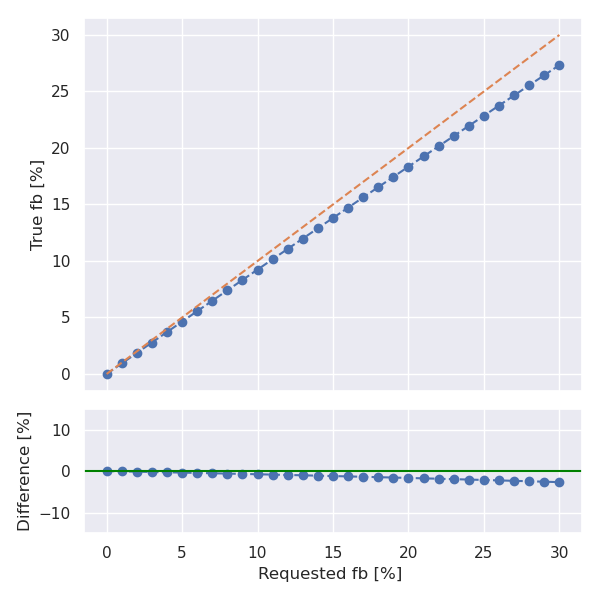

In [26]:
fig, axes = plt.subplots(
    2, 1, figsize=(6, 6), sharex=True, gridspec_kw={"height_ratios": [3, 1]}
)
axes[0].plot(np.array(fbs) * 100, np.array(true_fbs) * 100, "o--")
axes[1].set_xlabel("Requested fb [%] ")
axes[0].set_ylabel("True fb [%]")
axes[1].plot(np.array(fbs) * 100, np.array(true_fbs - fbs) * 100, "o--")
axes[0].plot(np.array(fbs) * 100, np.array(fbs) * 100, "--")

axes[1].set_ylabel("Difference [%]")
axes[1].set_ylim(-15, 15)
axes[1].axhline(0, color="green")
fig.tight_layout()

# Have a look at mass ratio distribution:

## (None of these plots are really working right now)

In [27]:
mj_new, Mj_new = bs.shift_flat(fb=0.15)
# mj_new, Mj_new = bs.shift_q(fb=[0.05,0.05],q=[1,0.9])

qs = []
for masses in bs.binary_components:
    q = np.min(masses) / np.max(masses)
    qs.append(q)

In [28]:
len(qs)

77

In [29]:
len(bs.Nj_shifted[bs.bin_mask])

77

In [30]:
qs

[0.1924221822274427,
 0.2024819462578588,
 0.2210350442453857,
 0.1924221822274427,
 0.23112298500735093,
 0.2024819462578588,
 0.27594593008982077,
 0.3049686072381006,
 0.31888723843779454,
 0.27594593008982077,
 0.3049686072381006,
 0.2654905927517611,
 0.31888723843779454,
 0.2793703476684714,
 0.38073078565607266,
 0.38073078529162563,
 0.4207742339831983,
 0.38073078565607266,
 0.38073078529162563,
 0.4207742339831983,
 0.366305246322124,
 0.4399781824703281,
 0.38545555603114906,
 0.5253055591189354,
 0.5253055588112888,
 0.5253055591189354,
 0.5253055588112888,
 0.5253055584499219,
 0.4207742339831983,
 0.5054022145749578,
 0.4399781824703281,
 0.5318244651605075,
 0.5253055591189354,
 0.7247796625598754,
 0.5253055591189354,
 0.5253055588112888,
 0.5253055584499219,
 0.580554692640627,
 0.5054022145749578,
 0.6070509502674424,
 0.6639435714108549,
 0.7247796625598754,
 0.7247796625598754,
 0.724779662364683,
 0.7247796621354063,
 0.7247796618660943,
 0.8010085315389087,
 0.697

Text(0.5, 0, '$q$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
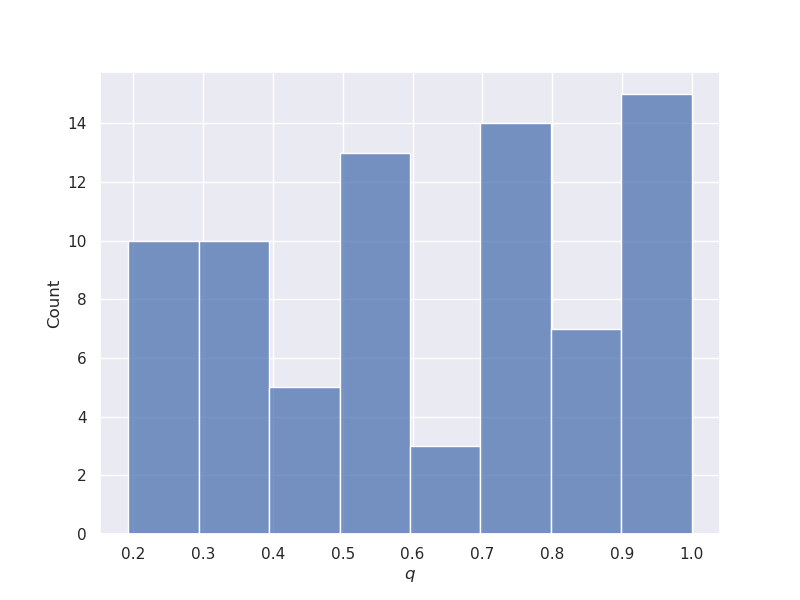

In [31]:
# this is just all of the q values, not how many stars per q value
plt.figure()
seaborn.histplot(qs)
plt.xlabel(r"$q$")

Text(0.5, 0, '$q$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
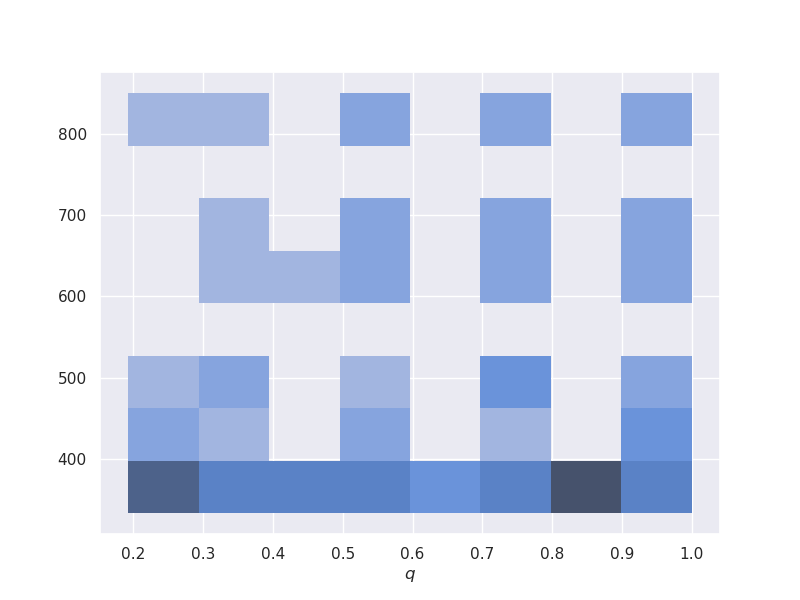

In [32]:
# TODO: this isnt quite what im looking for, want to plot number of Stars in each bin associated with its q value
# so i guess im looking for this but collapsed in the y direction? or binned together by x value?

plt.figure()
seaborn.histplot(x=qs, y=bs.Nj_shifted[bs.bin_mask])

plt.xlabel(r"$q$")

In [33]:
q_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
idxs = np.digitize(qs, bins=q_vals)

In [34]:
idxs

array([ 1,  2,  2,  1,  2,  2,  2,  3,  3,  2,  3,  2,  3,  2,  3,  3,  4,
        3,  3,  4,  3,  4,  3,  5,  5,  5,  5,  5,  4,  5,  4,  5,  5,  7,
        5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  7,  7,  8,  6,  7,  6, 10,
        7,  7,  7,  7,  8,  8,  7,  7, 10, 10, 10, 10, 10,  8,  8,  8,  8,
       10, 10, 10, 10, 10, 10, 10, 10, 10])

In [35]:
Nstars_per_q = np.zeros_like(q_vals)

for i, N in enumerate(bs.Nj_shifted[bs.bin_mask]):
    Nstars_per_q[idxs[i] - 1] += N

In [36]:
data = np.array([q_vals, Nstars_per_q])
# data = np.array([qs,bs.Nj_shifted[bs.bin_mask]])

In [37]:
data

array([[1.00000000e-01, 2.00000000e-01, 3.00000000e-01, 4.00000000e-01,
        5.00000000e-01, 6.00000000e-01, 7.00000000e-01, 8.00000000e-01,
        9.00000000e-01, 1.00000000e+00],
       [8.12962302e+02, 3.60723845e+03, 5.10379962e+03, 2.14101741e+03,
        7.20446551e+03, 1.42511214e+03, 7.38100244e+03, 2.65739481e+03,
        0.00000000e+00, 8.13283007e+03]])

<AxesSubplot:ylabel='Count'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
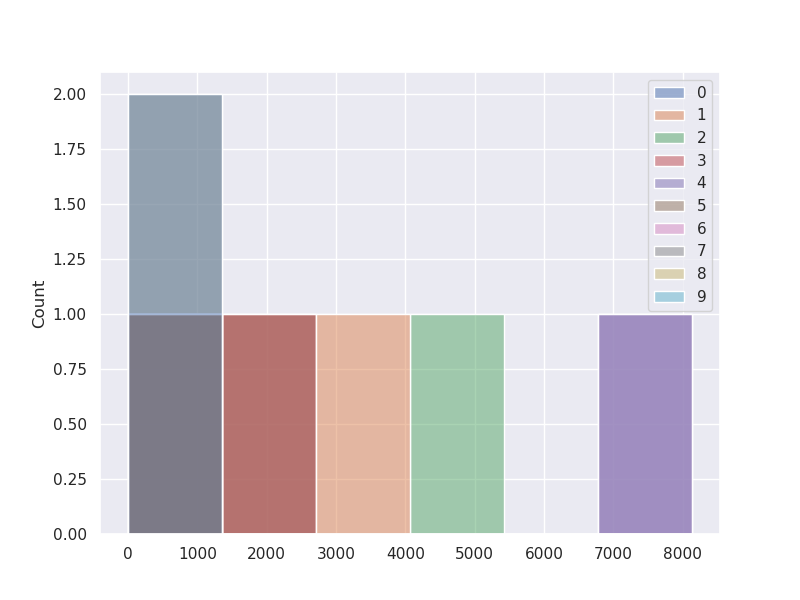

In [38]:
plt.figure()
seaborn.histplot(data=data)

In [39]:
# Have a look at models
stop

NameError: name 'stop' is not defined

In [ ]:
l = limepy(
    M=1e6, phi0=6, g=0.8, mj=mj, Mj=Mj, delta=0.45, rh=8, ra=10 ** 1.23, project=True
)

In [ ]:
l_bin = limepy(
    M=1e6,
    phi0=6,
    g=0.8,
    mj=mj_new,
    Mj=Mj_new,
    delta=0.45,
    rh=8,
    ra=10 ** 1.23,
    project=True,
)

In [ ]:
plt.figure()
plt.loglog()
plt.xlim(1e-2, 1e2)
plt.ylim(1e2, 1e7)
plt.plot(l.r, l.mcp, label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Enclosed Mass")
plt.plot(l_bin.r, l_bin.mcp, label="Binaries")
plt.legend()

In [ ]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2R), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vr")
plt.plot(l_bin.r, np.sqrt(l_bin.v2R), label="Binaries")
plt.legend()

In [ ]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2T), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vt")
plt.plot(l_bin.r, np.sqrt(l_bin.v2T), label="Binaries")
plt.legend()

In [ ]:
plt.figure()
plt.xscale("log")
plt.xlim(1e-2, 1e2)
plt.plot(l.r, np.sqrt(l.v2p), label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel("Vlos")
plt.plot(l_bin.r, np.sqrt(l_bin.v2p), label="Binaries")
plt.legend()

In [ ]:
plt.figure()
plt.loglog()
plt.xlim(1e-1, 1e2)
plt.ylim(1e-0, 1e6)
plt.plot(l.r, l.Sigma, label="No Binaries")
plt.xlabel("R [pc]")
plt.ylabel(r"$\Sigma$")
plt.plot(l_bin.r, l_bin.Sigma, label="Binaries")
plt.legend()